Ref principal: https://github.com/eduonix/nlptextclassification/blob/master/NLP%20for%20Text%20Classification%20(Jupyter%20Notebook).ipynb

### Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Carregando datasets

- Treino

In [2]:
treino = pd.read_csv('datasets/Chamados_Treino.csv') 
display(treino.info())
treino.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 2 columns):
label       1957 non-null int64
features    1957 non-null object
dtypes: int64(1), object(1)
memory usage: 30.7+ KB


None

,label,features
0,0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
1,0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
2,0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
3,1,"{'coloq': False, 'imprim': False, 'frent': Fal..."
4,1,"{'coloq': False, 'imprim': False, 'frent': Fal..."


- Teste

In [3]:
teste = pd.read_csv('datasets/Chamados_Teste.csv') 
display(teste.info())
teste.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 2 columns):
label       653 non-null int64
features    653 non-null object
dtypes: int64(1), object(1)
memory usage: 10.3+ KB


None

,label,features
0,0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
1,0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
2,0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
3,0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
4,1,"{'coloq': False, 'imprim': False, 'frent': Fal..."


- Validação

In [4]:
validacao = pd.read_csv('datasets/Chamados_Validação.csv') 
display(validacao.info())
validacao.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 1 columns):
features    407 non-null object
dtypes: object(1)
memory usage: 3.3+ KB


None

,features
0,"{'coloq': False, 'imprim': False, 'frent': Fal..."
1,"{'coloq': False, 'imprim': False, 'frent': Fal..."
2,"{'coloq': False, 'imprim': False, 'frent': Fal..."
3,"{'coloq': False, 'imprim': False, 'frent': Fal..."
4,"{'coloq': False, 'imprim': False, 'frent': Fal..."


### Criando modelos

# PAREI AQUI

FAZER WORDCLOUD NO OTRO NOTEBOOK

In [14]:
# Definindo modelos
names = ["k-NN", "Árvores de decisão", "Naive Bayes", "MultiLayer Perceptron (MLP)"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    MultinomialNB(),
    MLPClassifier()
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(treino[['features','label']].values)
    accuracy = nltk.classify.accuracy(nltk_model, teste)*100
    print("{} Accuracy: {}".format(name, accuracy))

AttributeError: 'str' object has no attribute 'items'

In [11]:
treino.values[:,0]

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

### Classificadores

In [0]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 76.61406025824964


In [0]:
from sklearn.metrics import confusion_matrix

txt_features, labels = zip(*testing)

prediction = model.classify_many(txt_features)


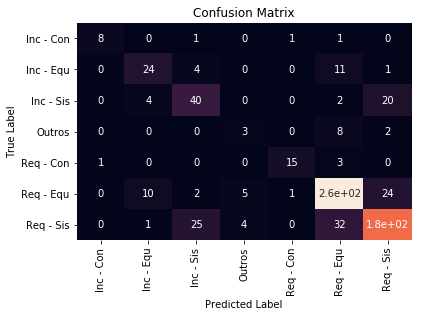

In [0]:
axes = ['Inc - Con', 'Inc - Equ', 'Inc - Sis', 'Outros', 'Req - Con', 'Req - Equ', 'Req - Sis']


sns.heatmap(confusion_matrix(labels, prediction), annot=True, cbar=False,  xticklabels= axes, yticklabels=axes)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()